In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'axes.grid': True, 'grid.linestyle': ':'})

In [2]:
# df_yolov8_x1280 = pd.read_csv('speed_test_x1280_yolov8.csv')
df_yolov8_x640 = pd.read_csv('yolov8_onnx.csv', index_col=0)
# df_rtdetr_x1280 = pd.read_csv('speed_test_x1280_rtdetr.csv').head(5)
df_rtdetr_x640 = pd.read_csv('rtdetr_onnx.csv', index_col=0).head(5)
yolov8_eval = pd.read_csv("yolov8_eval.csv")
rtdetr_eval = pd.read_csv("rtdetr_eval.csv").head(5)

rtdetr_reported_map = [46.4, 48.9, 51.3, 53.1, 54.3]
yolov8_reported_map = [37.3, 44.9, 50.2, 52.9, 53.9]

In [5]:
yolos = pd.concat([yolov8_eval, df_yolov8_x640[["inference_time"]]], axis=1)
rtdetr = pd.concat([rtdetr_eval, df_rtdetr_x640[["inference_time"]]], axis=1)

# convert to FPS
yolos["FPS"] = 1 / yolos["inference_time"] * 1000
rtdetr["FPS"] = 1 / rtdetr["inference_time"] * 1000

# add reported mAP
yolos["mAP_reported"] = yolov8_reported_map
rtdetr["mAP_reported"] = rtdetr_reported_map

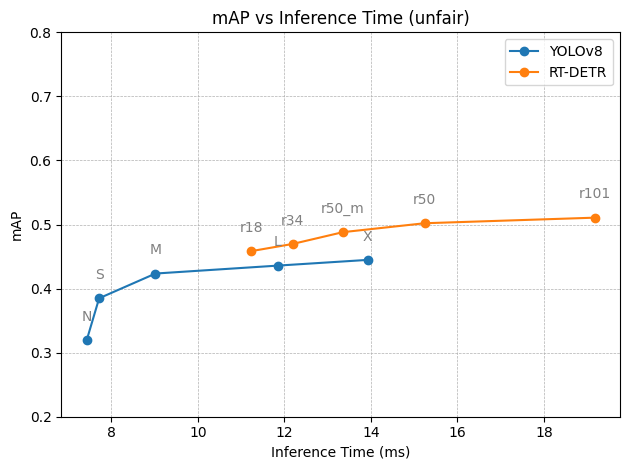

In [17]:
metric = "mAP"

plt.plot(yolos["total"], yolos[metric], label="YOLOv8", marker='o')
plt.plot(rtdetr["total"], rtdetr[metric], label="RT-DETR", marker='o')

for name, x, y in zip(yolos["Model"], yolos["total"], yolos[metric]):
    plt.text(x, y + 0.03, f'{name.split("-")[1]}', ha='center', color='gray')

for name, x, y in zip(rtdetr["Model"], rtdetr["total"], rtdetr[metric]):
    plt.text(x, y + 0.03, f'{name.split()[1]}', ha='center', color='gray')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("Inference Time (ms)")
plt.ylabel(f"{metric}")
plt.title(f"{metric} vs Inference Time (unfair)")
plt.legend()
plt.ylim(0.2, 0.8)
plt.tight_layout()

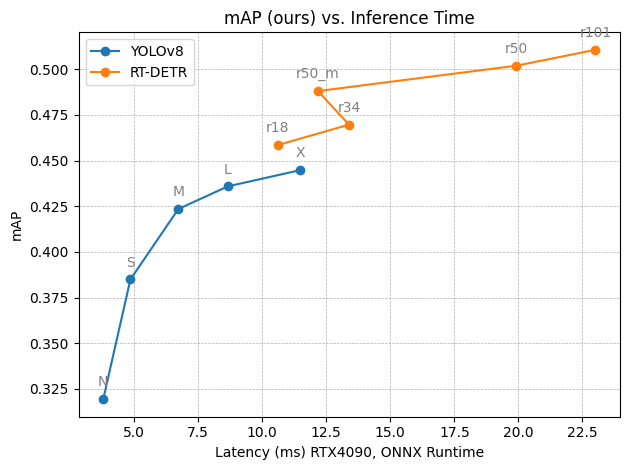

In [32]:
metric = "mAP"

plt.plot(yolos["inference_time"], yolos[metric], label="YOLOv8", marker='o')
plt.plot(rtdetr["inference_time"], rtdetr[metric], label="RT-DETR", marker='o')

for name, x, y in zip(yolos["Model"], yolos["inference_time"], yolos[metric]):
    plt.text(x, y + 0.007, f'{name.split("-")[1]}', ha='center', color='gray')

for name, x, y in zip(rtdetr["Model"], rtdetr["inference_time"], rtdetr[metric]):
    plt.text(x, y + 0.007, f'{name.split()[1]}', ha='center', color='gray')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("Latency (ms) RTX4090, ONNX Runtime")
plt.ylabel(f"{metric}")
plt.title(f"{metric} (ours) vs. Inference Time")
plt.legend()
# plt.ylim(0.2, 0.8)
plt.tight_layout()
plt.savefig("mAP_vs_inference_time.png")

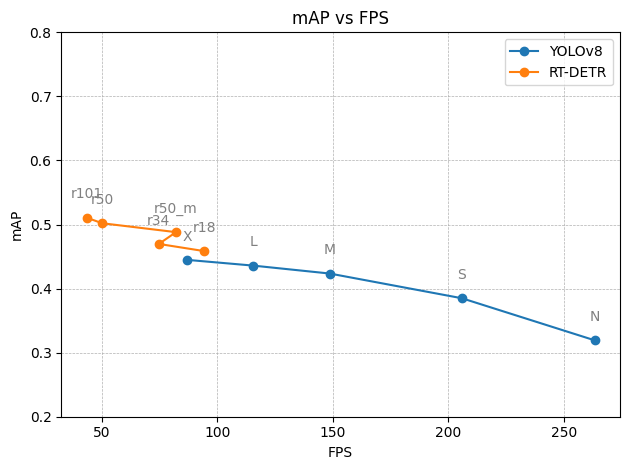

In [19]:
metric = "mAP"

plt.plot(yolos["FPS"], yolos[metric], label="YOLOv8", marker='o')
plt.plot(rtdetr["FPS"], rtdetr[metric], label="RT-DETR", marker='o')

for name, x, y in zip(yolos["Model"], yolos["FPS"], yolos[metric]):
    plt.text(x, y + 0.03, f'{name.split("-")[1]}', ha='center', color='gray')

for name, x, y in zip(rtdetr["Model"], rtdetr["FPS"], rtdetr[metric]):
    plt.text(x, y + 0.03, f'{name.split()[1]}', ha='center', color='gray')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("FPS")
plt.ylabel(f"{metric}")
plt.title(f"{metric} vs FPS")
plt.legend()
plt.ylim(0.2, 0.8)
plt.tight_layout()

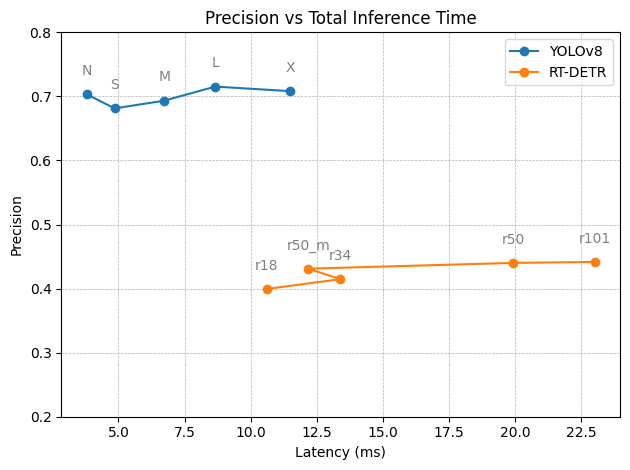

In [9]:
metric = "Precision"
plt.plot(yolos["inference_time"], yolos[metric], label="YOLOv8", marker='o')
plt.plot(rtdetr["inference_time"], rtdetr[metric], label="RT-DETR", marker='o')

for name, x, y in zip(yolos["Model"], yolos["inference_time"], yolos[metric]):
    plt.text(x, y + 0.03, f'{name.split("-")[1]}', ha='center', color='gray')

for name, x, y in zip(rtdetr["Model"], rtdetr["inference_time"], rtdetr[metric]):
    plt.text(x, y + 0.03, f'{name.split()[1]}', ha='center', color='gray')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("Latency (ms)")
plt.ylabel(f"{metric}")
plt.title(f"{metric} vs Total Inference Time")
plt.legend()
plt.ylim(0.2, 0.8)
plt.tight_layout()

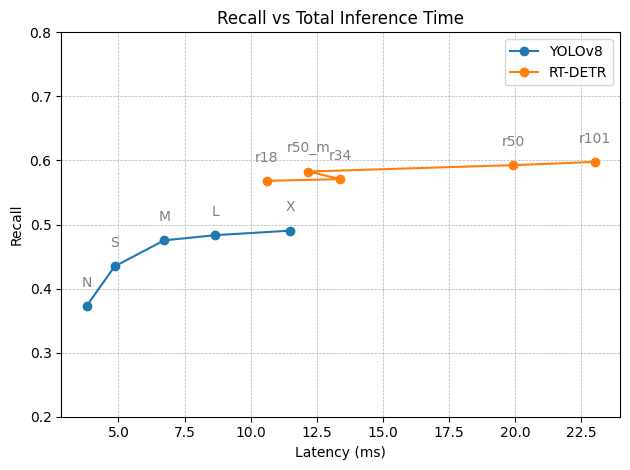

In [18]:
metric = "Recall"
plt.plot(yolos["inference_time"], yolos[metric], label="YOLOv8", marker='o')
plt.plot(rtdetr["inference_time"], rtdetr[metric], label="RT-DETR", marker='o')

for name, x, y in zip(yolos["Model"], yolos["inference_time"], yolos[metric]):
    plt.text(x, y + 0.03, f'{name.split("-")[1]}', ha='center', color='gray')

for name, x, y in zip(rtdetr["Model"], rtdetr["inference_time"], rtdetr[metric]):
    plt.text(x, y + 0.03, f'{name.split()[1]}', ha='center', color='gray')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("Latency (ms)")
plt.ylabel(f"{metric}")
plt.title(f"{metric} vs Total Inference Time")
plt.legend()
plt.ylim(0.2, 0.8)
plt.tight_layout()

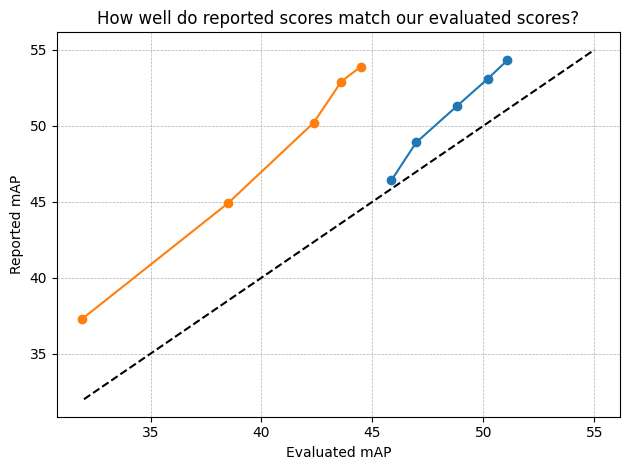

In [31]:
rtdetr_map = rtdetr_eval["mAP"] * 100
yolov8_map = yolov8_eval["mAP"] * 100

plt.plot(rtdetr_map, rtdetr_reported_map, label="RT-DETR", marker='o')
plt.plot(yolov8_map, yolov8_reported_map, label="YOLOv8", marker='o')
plt.plot([32,55], [32,55], label="Ideal", linestyle='--', color='black')
plt.grid(linestyle='--', linewidth=0.5)
plt.ylabel("Reported mAP")
plt.xlabel("Evaluated mAP")
plt.title("How well do reported scores match our evaluated scores?")
plt.tight_layout()

/tmp/ipykernel_216354/381016254.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(model_names, rotation=45, ha='right')
/tmp/ipykernel_216354/381016254.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names, rotation=45, ha='right')


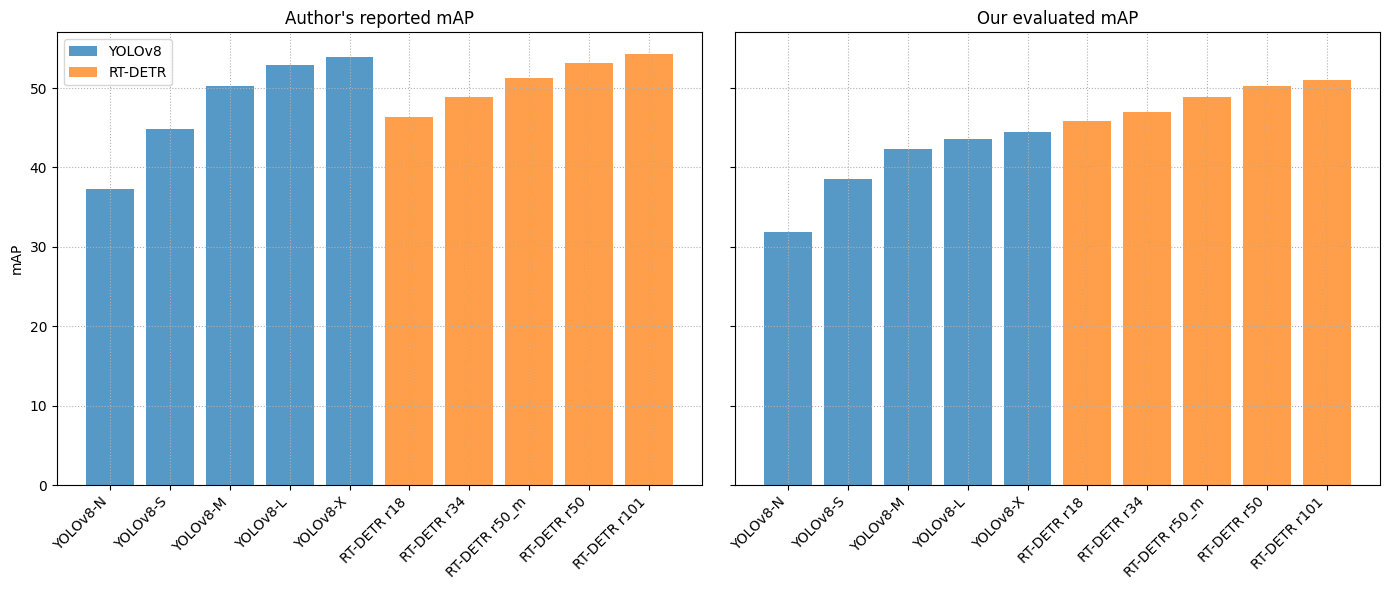

In [100]:
# How well do reported scores match our evaluated scores?
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax0, ax1 = axes[0], axes[1]
ax0.bar(yolov8_eval["Model"], yolov8_reported_map, label="YOLOv8", color='C0', alpha=0.75)
ax0.bar(rtdetr_eval["Model"], rtdetr_reported_map, label="RT-DETR", color='C1', alpha=0.75)
ax1.bar(yolov8_eval["Model"], yolov8_eval["mAP"] * 100, label="YOLOv8", color='C0', alpha=0.75)
ax1.bar(rtdetr_eval["Model"], rtdetr_eval["mAP"] * 100, label="RT-DETR", color='C1', alpha=0.75)
ax0.set_title("Author's reported mAP")
ax1.set_title("Our evaluated mAP")
ax0.set_ylabel("mAP")
ax0.legend()
model_names = yolov8_eval["Model"].tolist() + rtdetr_eval["Model"].tolist()
ax0.set_xticklabels(model_names, rotation=45, ha='right')
ax1.set_xticklabels(model_names, rotation=45, ha='right')
plt.tight_layout()
# plt.show()
plt.savefig("reported_vs_evaluated_mAP.png")

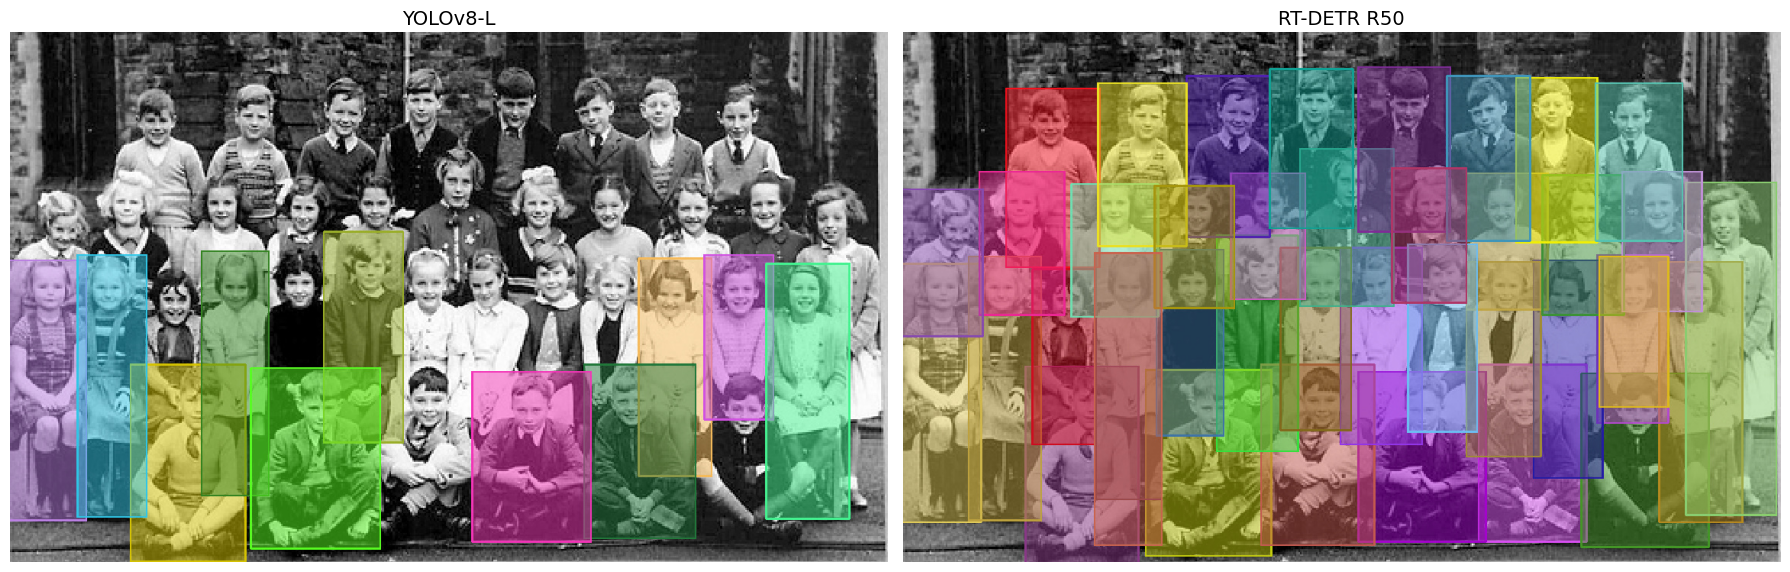

In [87]:
from PIL import Image
img0 = Image.open("YOLOv8 persons.jpg")
img1 = Image.open("RT-DETR persons.jpg")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
ax0, ax1 = axes[0], axes[1]
ax0.imshow(img0)
ax1.imshow(img1)
ax0.axis('off')
ax1.axis('off')
ax0.set_title("YOLOv8-L", fontsize=14)
ax1.set_title("RT-DETR R50", fontsize=14)
plt.tight_layout()
plt.savefig("person_detection_comparison.jpg")

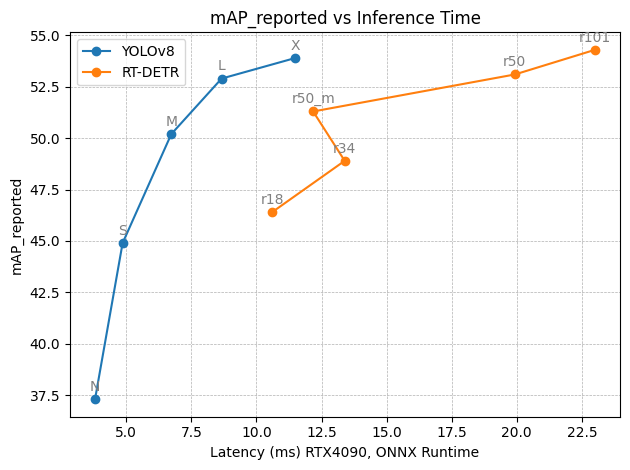

In [22]:
metric = "mAP_reported"

plt.plot(yolos["inference_time"], yolos[metric], label="YOLOv8", marker='o')
plt.plot(rtdetr["inference_time"], rtdetr[metric], label="RT-DETR", marker='o')

for name, x, y in zip(yolos["Model"], yolos["inference_time"], yolos[metric]):
    plt.text(x, y + 0.4, f'{name.split("-")[1]}', ha='center', color='gray')

for name, x, y in zip(rtdetr["Model"], rtdetr["inference_time"], rtdetr[metric]):
    plt.text(x, y + 0.4, f'{name.split()[1]}', ha='center', color='gray')

plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel("Latency (ms) RTX4090, ONNX Runtime")
plt.ylabel(f"{metric}")
plt.title(f"{metric} vs Inference Time")
plt.legend()
# plt.ylim(20, 80)
plt.tight_layout()
plt.savefig("mAP_reported_vs_latency.png")

/tmp/ipykernel_216354/2709146570.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(model_names, rotation=45, ha='right')
/tmp/ipykernel_216354/2709146570.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names, rotation=45, ha='right')


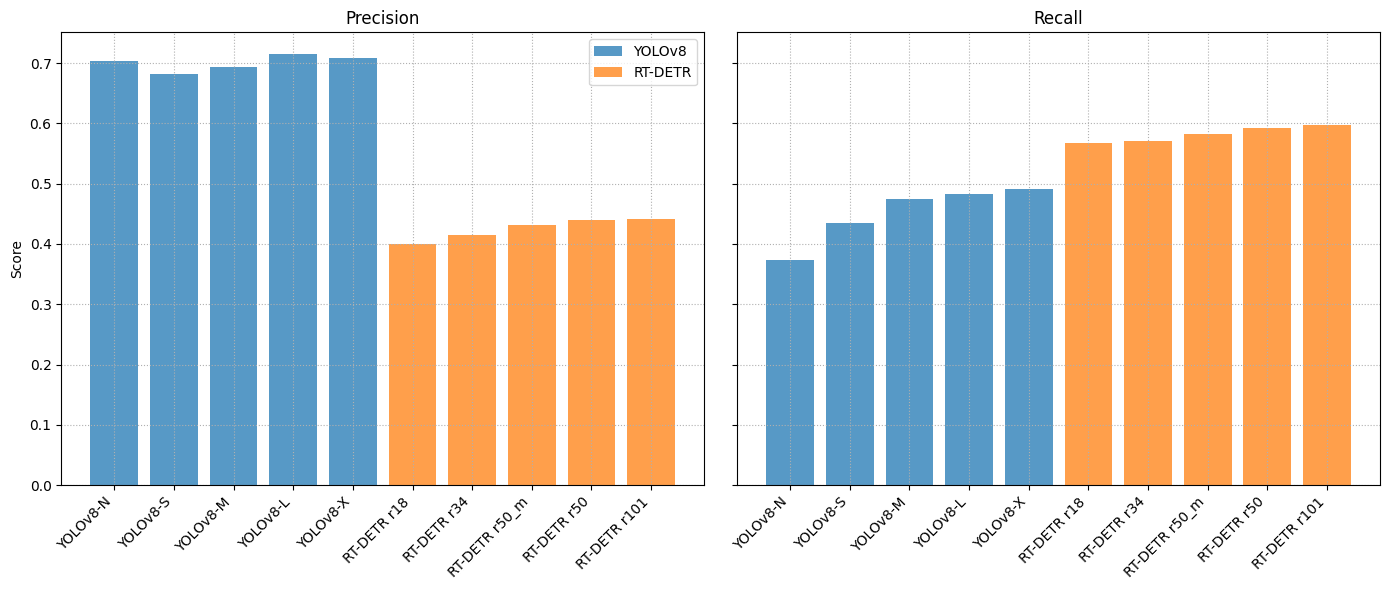

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
ax0, ax1 = axes[0], axes[1]
metric = "Precision"
ax0.bar(yolos["Model"], yolos[metric], label="YOLOv8", alpha=0.75)
ax0.bar(rtdetr["Model"], rtdetr[metric], label="RT-DETR", alpha=0.75)
metric = "Recall"
ax1.bar(yolos["Model"], yolos[metric], label="YOLOv8", alpha=0.75)
ax1.bar(rtdetr["Model"], rtdetr[metric], label="RT-DETR", alpha=0.75)
ax0.set_title("Precision")
ax1.set_title("Recall")
ax0.set_ylabel("Score")
ax0.legend()

model_names = yolov8_eval["Model"].tolist() + rtdetr_eval["Model"].tolist()
ax0.set_xticklabels(model_names, rotation=45, ha='right')
ax1.set_xticklabels(model_names, rotation=45, ha='right')
plt.tight_layout()
# plt.show()
plt.savefig("precision_recall.png")